# CNN(Convolution Neural Network)
---
 - 이미지, 영상 처리에 사용되는 신경망 모델
 - DNN의 한 분야
 - 텍스트 처리에도 사용되는 모델
 - 사용되는 Layer
   - ConvXD: 이미지 형태 그대로 입력받아 특징을 추출하는 레이어
   - Polling: 특징맵에서 특징을 다시 추출하여 다운샘플링하는 레이어, 크기를 반으로 줄임


In [23]:
from keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets.fashion_mnist import load_data

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# W,b고정하도록 seed 설정
set_random_seed(11)

## [1] 데이터 준비 및 로딩

In [8]:
(x_train, y_train), (x_test, y_test) = load_data()

In [9]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리 및 학습형태로 변환

In [10]:
# 스케일링 -> 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [11]:
# Conv 레이어는 이미지의 채널 정보까지 입력
# .reshape(샘플수, 이미지가로, 이미지세로, 채널정보)
x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

In [12]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=11)

In [15]:
x_train.shape, x_val.shape

((45000, 28, 28, 1), (15000, 28, 28, 1))

## [3] 모델 구성 및 생성
---
 - 입력 형태: 채널정보까지 포함해서 3차원(28, 28, 1)
 - 출력 형태: 0~9정수 확률값 10개출력
 - 학습 방식: 분류 - 다중분류
 - 전반부
   - 이미지 특징 추출
     - Conv2D, MaxPool2D
 - 후반부
   - 이미지 데이터 학습
     - Flatten, Dense

### [3-1] 모델 구상

In [24]:
model=Sequential()

In [25]:
# 이미지 특징 추출 Layer -> 첫번째 입력값 설정
model.add(Conv2D(10,kernel_size=3, padding='same', input_shape=(28,28,1)))

In [26]:
# 이미지 특징 다운샘플링(다운사이즈) Layer -> MaxPool2D: 기본값(2,2) -> 가로세로 반으로 줌
model.add(MaxPool2D())

In [27]:
# 1차원으로 데이터 형태 변환 Layer -> Flatten
model.add(Flatten())

In [28]:
# 출력층 -> Node: 10개(0~9), activation:softmax
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1960)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                19610     
                                                                 
Total params: 19,710
Trainable params: 19,710
Non-trainable params: 0
_________________________________________________________________


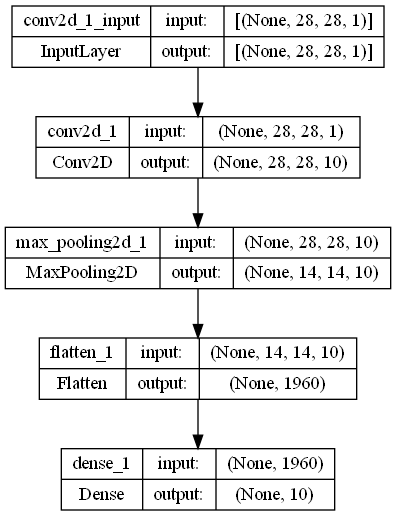

In [31]:
# plot_model(model, show_shapes=True, to_file='cnn.png')

### [3-2] 모델 생성
---
 - compile 메서드
   - loss 손실 함수 -> sparse_categorical_crossentropy
   - optimzer 최적화 방식 -> adam
   - metrics 평가항목 -> accuracy

In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

### [3-3] 모델 학습
---
 - fit 메서드
   - 학습 데이터, 라벨
   - epochs 학습횟수
   - batch_size 학습분량
   - 검증 방법
     - validation_data (검증데이터, 검증라벨)
     - validation_split 학습데이터의 일부 비율 설정(예:0.2)
   - callbacks
   - verbose: 학습 진행도 화면 출력 여부 설정

In [35]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3125 - accuracy: 0.8899 - val_loss: 0.3329 - val_accuracy: 0.8849
Epoch 2/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2985 - accuracy: 0.8959 - val_loss: 0.3228 - val_accuracy: 0.8887
Epoch 3/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2843 - accuracy: 0.8997 - val_loss: 0.3158 - val_accuracy: 0.8916
Epoch 4/30
1407/1407 [==============================] - 9s 7ms/step - loss: 0.2738 - accuracy: 0.9029 - val_loss: 0.3147 - val_accuracy: 0.8914
Epoch 5/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2637 - accuracy: 0.9068 - val_loss: 0.3070 - val_accuracy: 0.8970
Epoch 6/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2542 - accuracy: 0.9112 - val_loss: 0.3090 - val_accuracy: 0.8946
Epoch 7/30
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2463 - accuracy: 0.9131 - val_loss: 0.3065 - val_accuracy

## [4] 평가
---
 - evaluate 메서드
 - 테스트 데이터, 테스트 라벨

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3525 - accuracy: 0.8919


[0.3525281250476837, 0.8919000029563904]

## [5] 테스트
---
 - 새로운 데이터

In [41]:
x_test[0].shape

(28, 28, 1)

In [43]:
pre_y=model.predict(x_test[0].reshape(-1,28,28,1))

1/1 [==============================] - 0s 21ms/step


In [44]:
pre_y.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [46]:
y_test[0]

9

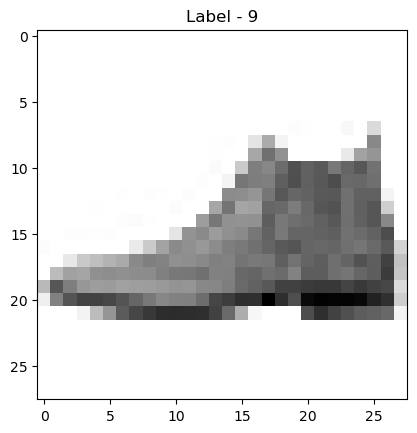

In [52]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray_r')
plt.title(f'Label - {y_test[0]}')
plt.show()